# Análisis EDA de Default en Préstamos
Autor: Tu Nombre
Fecha: 2025-04-01

## 1. Importar librerías

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

## 2. Cargar datos

In [6]:
# Ruta del archivo local Carga de datos y normalización de nombres
file_path = "Loan_default.csv"
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.head()

,loanid,age,income,loanamount,creditscore,monthsemployed,numcreditlines,interestrate,loanterm,dtiratio,education,employmenttype,maritalstatus,hasmortgage,hasdependents,loanpurpose,hascosigner,default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


## 3. Información general del dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   loanid          255347 non-null  object 
 1   age             255347 non-null  int64  
 2   income          255347 non-null  int64  
 3   loanamount      255347 non-null  int64  
 4   creditscore     255347 non-null  int64  
 5   monthsemployed  255347 non-null  int64  
 6   numcreditlines  255347 non-null  int64  
 7   interestrate    255347 non-null  float64
 8   loanterm        255347 non-null  int64  
 9   dtiratio        255347 non-null  float64
 10  education       255347 non-null  object 
 11  employmenttype  255347 non-null  object 
 12  maritalstatus   255347 non-null  object 
 13  hasmortgage     255347 non-null  object 
 14  hasdependents   255347 non-null  object 
 15  loanpurpose     255347 non-null  object 
 16  hascosigner     255347 non-null  object 
 17  default   

## 4. Estadísticas descriptivas

In [8]:
df.describe()

,age,income,loanamount,creditscore,monthsemployed,numcreditlines,interestrate,loanterm,dtiratio,default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


## 5. Análisis Exploratorio de Datos (EDA)

Resumen estadístico:
                 age         income     loanamount    creditscore  \
count  255347.000000  255347.000000  255347.000000  255347.000000   
mean       43.498306   82499.304597  127578.865512     574.264346   
std        14.990258   38963.013729   70840.706142     158.903867   
min        18.000000   15000.000000    5000.000000     300.000000   
25%        31.000000   48825.500000   66156.000000     437.000000   
50%        43.000000   82466.000000  127556.000000     574.000000   
75%        56.000000  116219.000000  188985.000000     712.000000   
max        69.000000  149999.000000  249999.000000     849.000000   

       monthsemployed  numcreditlines   interestrate       loanterm  \
count   255347.000000   255347.000000  255347.000000  255347.000000   
mean        59.541976        2.501036      13.492773      36.025894   
std         34.643376        1.117018       6.636443      16.969330   
min          0.000000        1.000000       2.000000      12.000000   
25

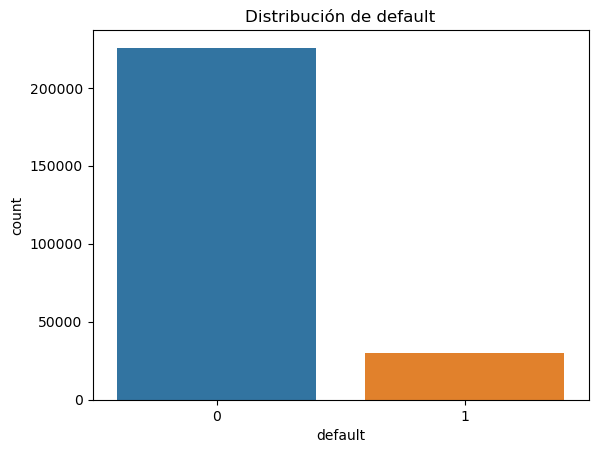


Correlación entre variables numéricas:


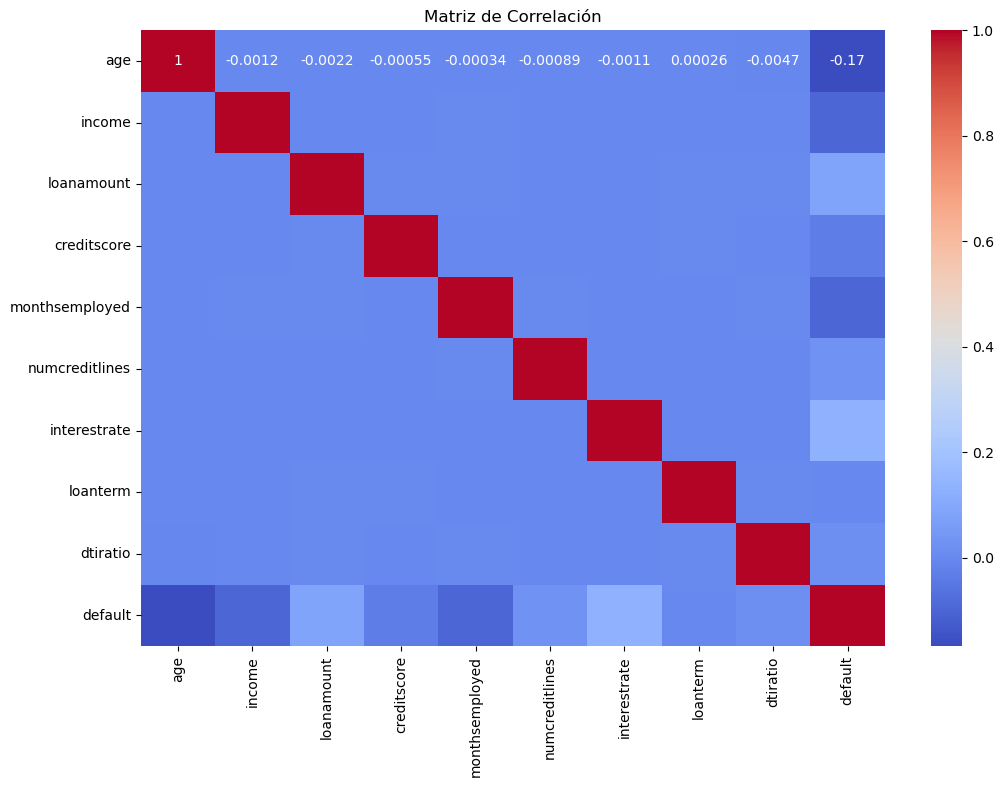

In [10]:
print("Resumen estadístico:")
print(df.describe())

print("\nValores nulos:")
print(df.isnull().sum())

print("\nDistribución de la variable objetivo (default):")
sns.countplot(x='default', data=df)
plt.title('Distribución de default')
plt.show()

print("\nCorrelación entre variables numéricas:")
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number])  # Solo columnas numéricas
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


## 6. Valores nulos por columna

In [11]:
df.isnull().sum()

loanid            0
age               0
income            0
loanamount        0
creditscore       0
monthsemployed    0
numcreditlines    0
interestrate      0
loanterm          0
dtiratio          0
education         0
employmenttype    0
maritalstatus     0
hasmortgage       0
hasdependents     0
loanpurpose       0
hascosigner       0
default           0
dtype: int64

## 7.  Análisis por grupos: default vs no-default

In [13]:
if 'default' in df.columns:
    numeric_cols = df.select_dtypes(include=np.number).columns.drop('default')
    for col in numeric_cols:
        group0 = df[df['default'] == 0][col].dropna()
        group1 = df[df['default'] == 1][col].dropna()
        stat, p = stats.ttest_ind(group0, group1)
        print(f"Prueba t para {col}: estadístico={stat:.3f}, p-valor={p:.3f}")

Prueba t para age: estadístico=86.003, p-valor=0.000
Prueba t para income: estadístico=50.335, p-valor=0.000
Prueba t para loanamount: estadístico=-43.956, p-valor=0.000
Prueba t para creditscore: estadístico=17.275, p-valor=0.000
Prueba t para monthsemployed: estadístico=49.440, p-valor=0.000
Prueba t para numcreditlines: estadístico=-14.321, p-valor=0.000
Prueba t para interestrate: estadístico=-66.914, p-valor=0.000
Prueba t para loanterm: estadístico=-0.275, p-valor=0.783
Prueba t para dtiratio: estadístico=-9.722, p-valor=0.000


## 8.  Análisis por grupos: default vs no-default

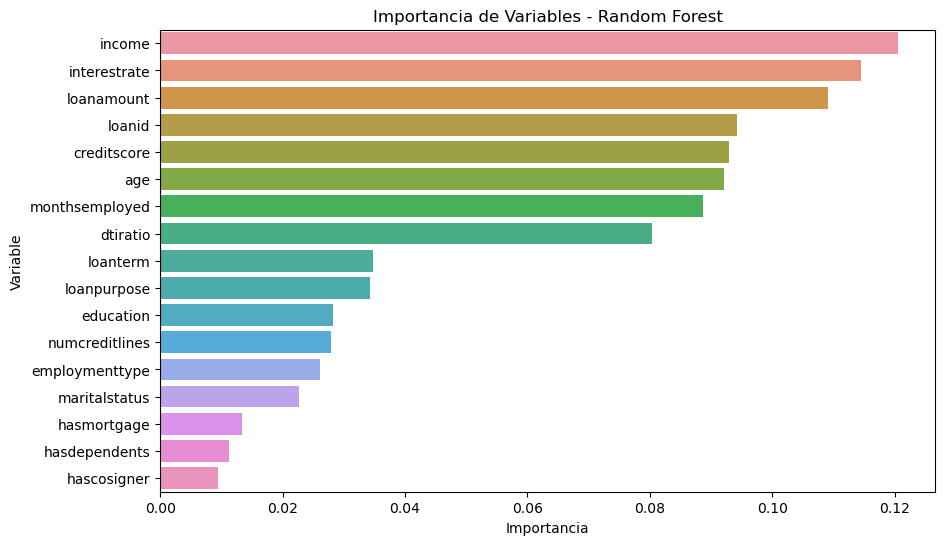

In [20]:
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values, y=importances.index)
plt.title('Importancia de Variables - Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.show()


# Selección de las N variables más importantes

In [22]:
top_features = importances.head(5).index.tolist()
print("Variables más importantes para el modelo:", top_features)

Variables más importantes para el modelo: ['income', 'interestrate', 'loanamount', 'loanid', 'creditscore']


## 9. Prueba de predicción con input manual

In [ ]:
print("\nPredicción con input de cliente nuevo (valores de ejemplo):")
input_data = {}
for feature in top_features:
    value = float(input(f"Ingrese valor para {feature}: "))
    input_data[feature] = value
input_df = pd.DataFrame([input_data])


Predicción con input de cliente nuevo (valores de ejemplo):


## 8. Pruebas para Selección de Modelos Predictivos



In [14]:
# Ajustado a nombre de columna normalizado
if 'loan_status' in df.columns:
    sns.countplot(data=df, x='loan_status', palette='Set2')
    plt.title('Comportamiento de Pago de los Clientes')
    plt.xlabel('Estado del Préstamo')
    plt.ylabel('Cantidad de Clientes')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("⚠️ La columna 'loan_status' no se encuentra en el DataFrame.")

⚠️ La columna 'loan_status' no se encuentra en el DataFrame.


##  # Codificar variables categóricas si las hay

In [15]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col].astype(str))

## # Separar variables predictoras y objetivo

In [16]:
X = df.drop("default", axis=1)
y = df["default"]


## # Dividir datos

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## # Modelo 1: Regresión Logística

In [18]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print("\nLogistic Regression Report:")
print(classification_report(y_test, y_pred_log))
print("ROC AUC:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.69      0.01      0.03      5900

    accuracy                           0.89     51070
   macro avg       0.79      0.51      0.48     51070
weighted avg       0.86      0.89      0.83     51070

ROC AUC: 0.7293437784940506


## # Modelo 2: Random Forest

In [19]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Report:")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))


Random Forest Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.65      0.04      0.08      5900

    accuracy                           0.89     51070
   macro avg       0.77      0.52      0.51     51070
weighted avg       0.86      0.89      0.84     51070

ROC AUC: 0.7337919310476806
